# Performing EDA on Cars Dataset #

Importing required dependencies

In [52]:
import pandas as pd # for loading dataframe (Most Important)
import numpy as np # for numerical analysis
import seaborn as sns # for applying layer of fine visual on top of plots
import matplotlib.pyplot as plt # for plotting purpose
%matplotlib inline 
sns.set(color_codes = True) # for setting color based code

Loading data into DataFrame

In [53]:
# as the data values are comma seperated, so just load into dataframe: let pandas handle this
df = pd.read_csv("/home/abhi/Documents/Dataset/cars_data.csv/cars.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [54]:
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [55]:
df.dtypes # to check data types

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

Dropping irrelevant columns

In [57]:
df = df.drop(['Engine Fuel Type','Market Category','Vehicle Style','Popularity','Number of Doors','Vehicle Size','Transmission Type'],axis=1)
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,rear wheel drive,28,18,34500


Renaming the columns: to improve the readability of data set

In [62]:
df = df.rename(columns = {"Engine HP":"HP","Engine Cylinders":"Cylinders","Driven_Wheels":"Drive Type","highway MPG":"MPG-H","city mpg":"MPG-C","MSRP":"Price"})
df.head()

,Make,Model,Year,HP,Cylinders,Drive Type,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,rear wheel drive,28,18,34500


Dropping the duplicate rows: Count the duplicate records first and then De-Duplicate i.e Drop them off

In [63]:
df.shape

(11914, 9)

In [67]:
duplicate_rows_df = df[df.duplicated()]
print("Count of duplicate rows:",duplicate_rows_df.shape)

Count of duplicate rows: (993, 9)


In [70]:
df = df.drop_duplicates()
df.count()

Make          10921
Model         10921
Year          10921
HP            10852
Cylinders     10891
Drive Type    10921
MPG-H         10921
MPG-C         10921
Price         10921
dtype: int64

In [72]:
df.shape

(10921, 9)

In [73]:
print(df.isnull().sum())

Make           0
Model          0
Year           0
HP            69
Cylinders     30
Drive Type     0
MPG-H          0
MPG-C          0
Price          0
dtype: int64


Dropping the Missing values/ Null Values

In [75]:
df = df.dropna()
df.count()

Make          10823
Model         10823
Year          10823
HP            10823
Cylinders     10823
Drive Type    10823
MPG-H         10823
MPG-C         10823
Price         10823
dtype: int64

In [76]:
print(df.isnull().sum())

Make          0
Model         0
Year          0
HP            0
Cylinders     0
Drive Type    0
MPG-H         0
MPG-C         0
Price         0
dtype: int64


In [77]:
# Detecting outliers which usually result in less accurate model

<AxesSubplot:xlabel='Price'>

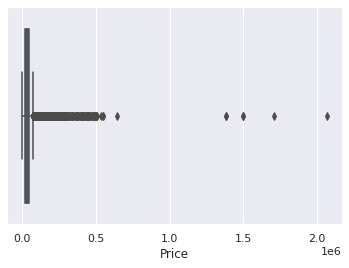

In [78]:
sns.boxplot(x=df['Price'])

<AxesSubplot:xlabel='HP'>

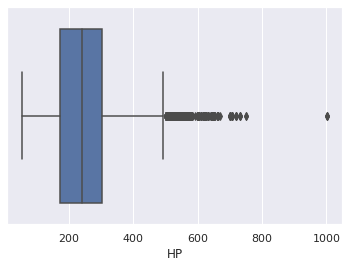

In [80]:
sns.boxplot(x=df['HP'])

<AxesSubplot:xlabel='Cylinders'>

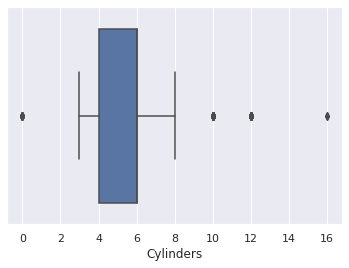

In [81]:
sns.boxplot(x=df['Cylinders'])

In [89]:
# Using Inter Quartile Range (IQR) Score technique for outlier detection in each of the required columns
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21322.5
dtype: float64


In [90]:
# Remove the outliers:
# Remember that its important on how to use it rather than knowing everything.
df = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
df.shape

<ipython-input-90-65974d60ff7b>:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
<ipython-input-90-65974d60ff7b>:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]


(9190, 9)

In [91]:
# Plot different features against one another(scatter), against frequency(histogram)

Largest Manufacturer: 


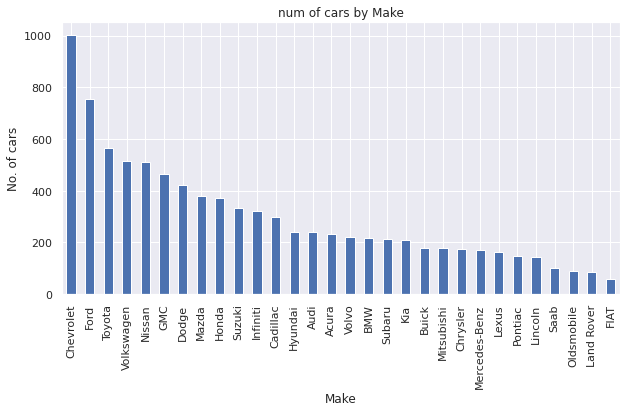

In [105]:
# total no. of cars manufactured by companies:
df.Make.value_counts().nlargest(30).plot(kind="bar",figsize=(10,5))
plt.title("num of cars by Make")
plt.ylabel('No. of cars')
plt.xlabel('Make')
print("Largest Manufacturer: ")

<AxesSubplot:>

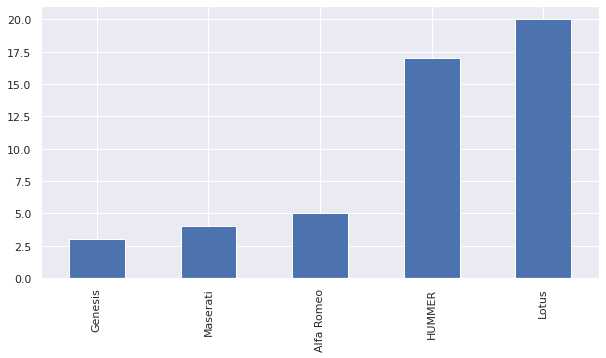

In [106]:
# checking for least count: Best suitable for Acquisition
df.Make.value_counts().nsmallest(5).plot(kind="bar",figsize=(10,5))

,Year,HP,Cylinders,MPG-H,MPG-C,Price
Year,1.000000,0.326733,-0.133848,0.378420,0.338111,0.592969
HP,0.326733,1.000000,0.715284,-0.443855,-0.544566,0.739049
Cylinders,-0.133848,0.715284,1.000000,-0.703815,-0.755530,0.354094
MPG-H,0.378420,-0.443855,-0.703815,1.000000,0.939160,-0.106403
MPG-C,0.338111,-0.544566,-0.755530,0.939160,1.000000,-0.180555
Price,0.592969,0.739049,0.354094,-0.106403,-0.180555,1.000000


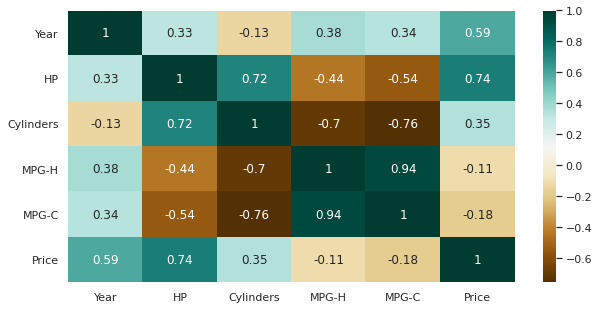

In [114]:
# Heatmaps: to find the relationship/ dependency of features on each other:
plt.figure(figsize=(10,5))
c= df.corr() # use of correlation matrix on dataframe
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [115]:
# we can say that price feature highly depends on HP, Year, Cylinders...

In [116]:
#Scatterplot: To find the correlation between 2 variables.

AttributeError: 'AxesSubplot' object has no attribute 'set_xLabel'

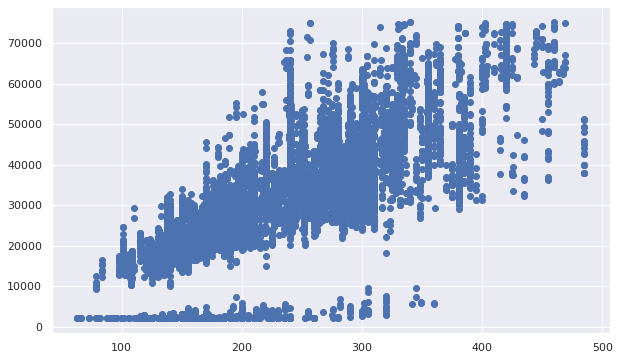

In [120]:
fig, ax = plt.subplots(figsize= (10,6))
ax.scatter(df['HP'],df['Price'])
ax.set_xLabel('HP')
ax.set_ylabel('Price')
plt.show()